<a href="https://colab.research.google.com/github/Nithie-code/CustomerSegmentation-KMeans/blob/main/CustomerSegmentation_Using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Imports**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly as py
import os
import io

**2.Load Dataset**

In [3]:
from  google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


**3.EDA**

In [90]:
#read the data
data = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
#Visualize 10 observations
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [91]:
data.shape


(200, 5)

In [92]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [93]:
#Check  missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [94]:
#drop  CustomerID column
data.drop(['CustomerID'], axis =1, inplace= True)

In [95]:
# visualize the data again
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [96]:
#check missing  values
data.isnull().sum()


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [97]:
# check the duplicates
data.duplicated().sum()

0

In [98]:
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

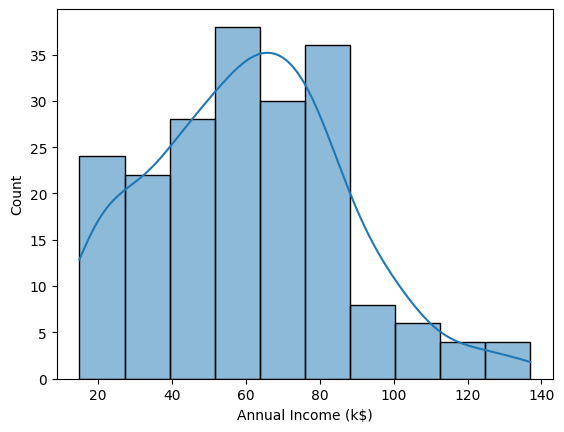

In [99]:
sns.histplot(data["Annual Income (k$)"], kde=True)

<Axes: xlabel='Age', ylabel='Count'>

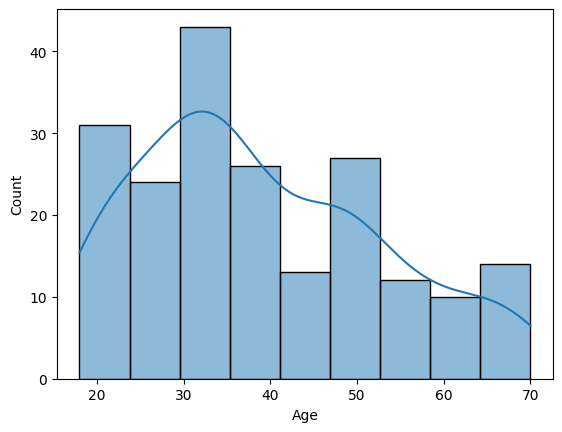

In [100]:
sns.histplot(data["Age"], kde=True)

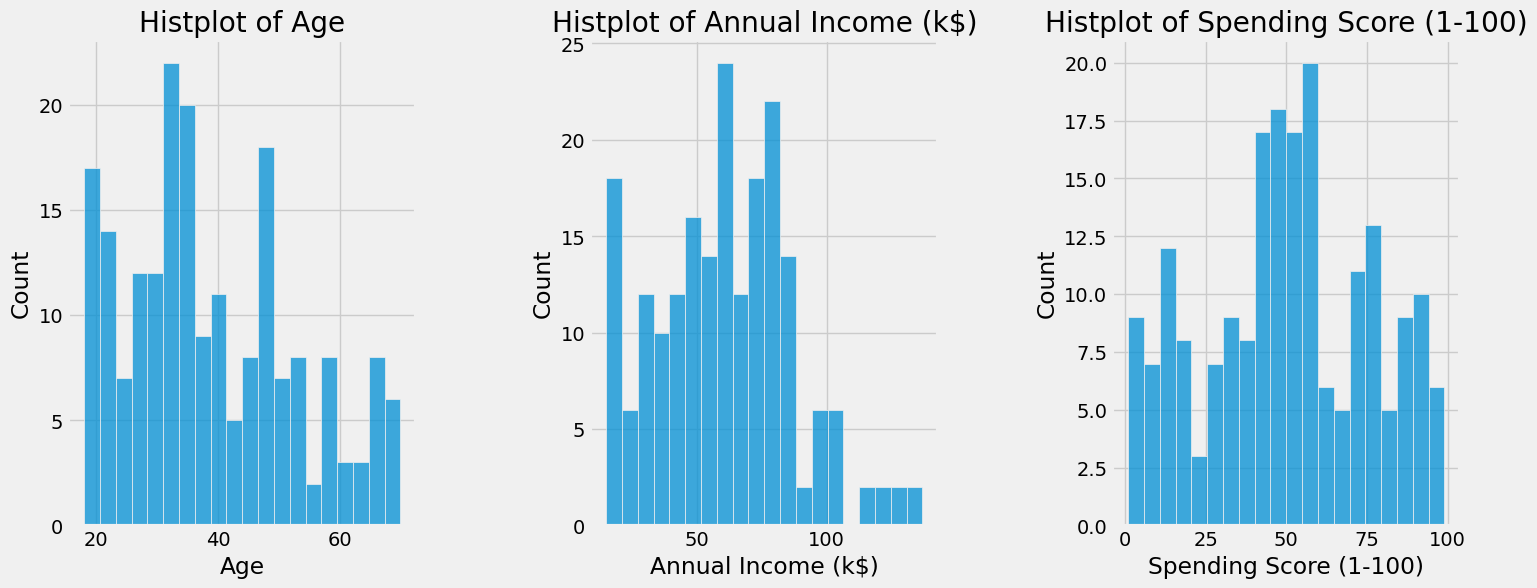

In [113]:

plt.figure(1 , figsize = (16 , 6))
n = 0
for i in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(data[i] , bins = 20)
    plt.title('Histplot of {}'.format(i))
plt.show()

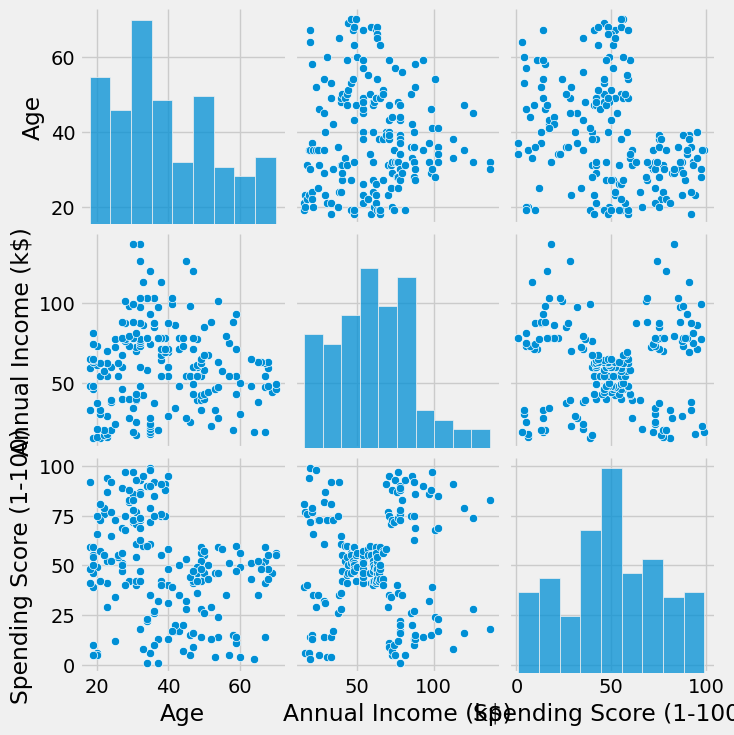

In [116]:
sns.pairplot(data)

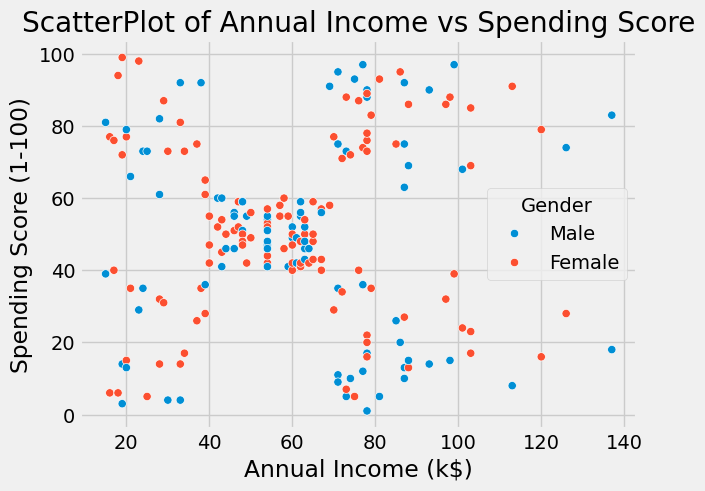

In [118]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Gender')

plt.title('ScatterPlot of Annual Income vs Spending Score')
plt.show()

**4.K-Means Model**

i.Segmentation based on Age and Spending Score

In [124]:

X1 = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for m in range(1,10):
    km = (KMeans(n_clusters =m,init='k-means++',n_init=9,max_iter=300,
               tol=0.0001, random_state=11))
    km.fit(X1)
    inertia.append(km.inertia_)


Inertia:measures the compactness of clusters .It is calculated as the sum of squared distances of each data point to its nearest centroid(cluster centroid)

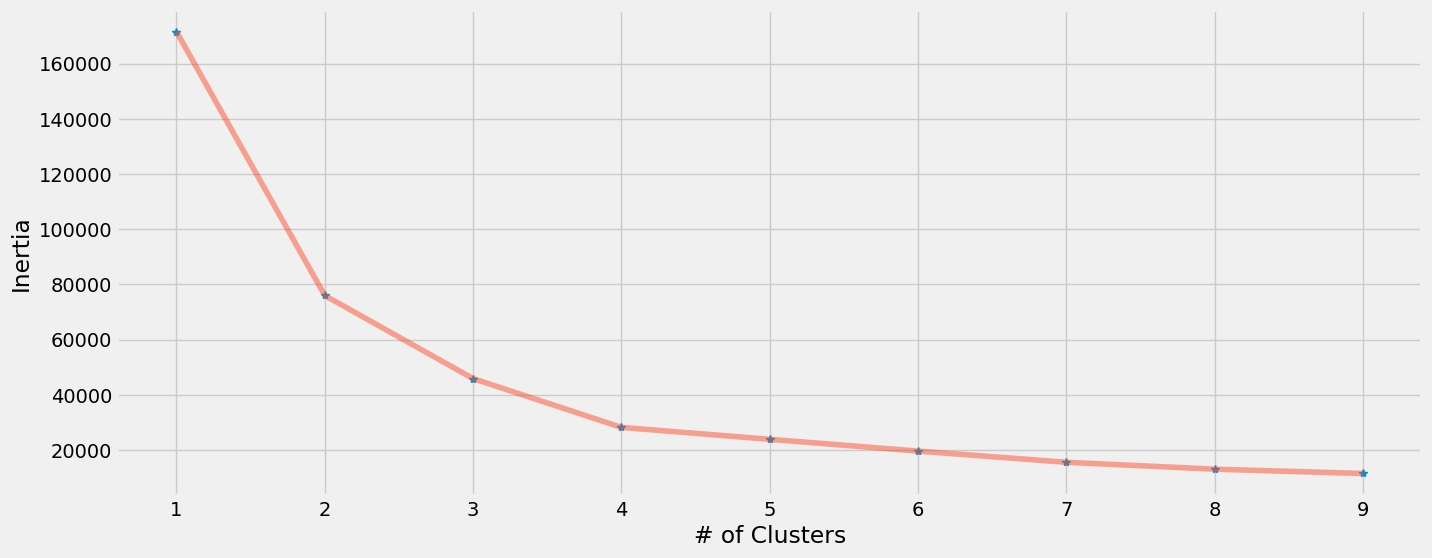

In [123]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , inertia , '*')
plt.plot(np.arange(1 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('# of Clusters') , plt.ylabel('Inertia')
plt.show()

 As depicted by the figure,k=4 can be considered a good number of the cluster to cluster this data.

In [125]:
km = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  ) )
km.fit(X1)
labels1 = km.labels_
centroids1 = km.cluster_centers_

In [126]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
pred = km.predict(np.c_[xx.ravel(), yy.ravel()])

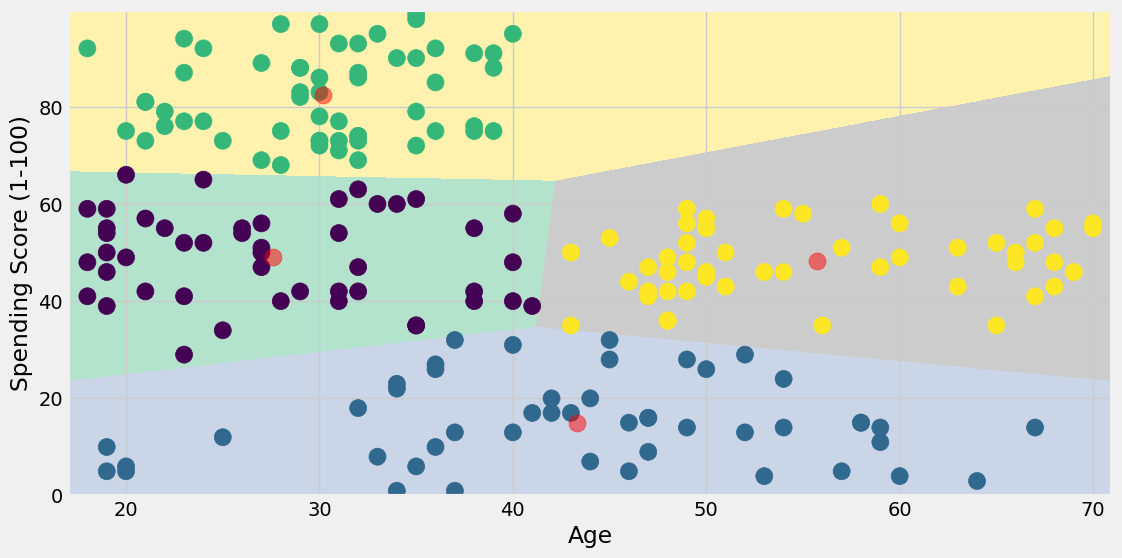

In [130]:
plt.figure(1 , figsize = (12, 6) )
plt.clf()
pred = pred.reshape(xx.shape)
plt.imshow(pred , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = data , c = labels1 ,
            s = 150 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 150 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

ii.Segmentation based on Annual Income and Spending Score

In [138]:
X2 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 10):
    km = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111) )
    km.fit(X2)
    inertia.append(km.inertia_)

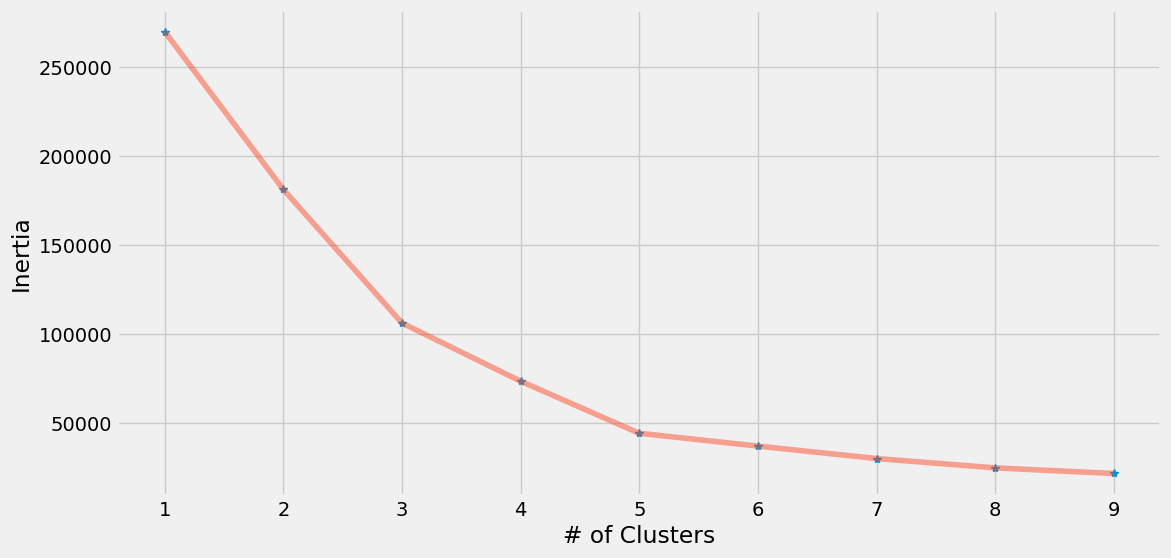

In [139]:
# Use Inertia to determine the number of clusters
plt.figure(1 , figsize = (12 ,6))
plt.plot(np.arange(1 , 10) , inertia , '*')
plt.plot(np.arange(1 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('# of Clusters') , plt.ylabel('Inertia')
plt.show()

As shown  by the figure,k=5 can be considered as a good number of the cluster.

In [140]:
km = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  ) )
km.fit(X2)
labels2 = km.labels_
centroids2 = km.cluster_centers_

In [141]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
pred2 = km.predict(np.c_[xx.ravel(), yy.ravel()])

In [142]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
pred2 = km.predict(np.c_[xx.ravel(), yy.ravel()])

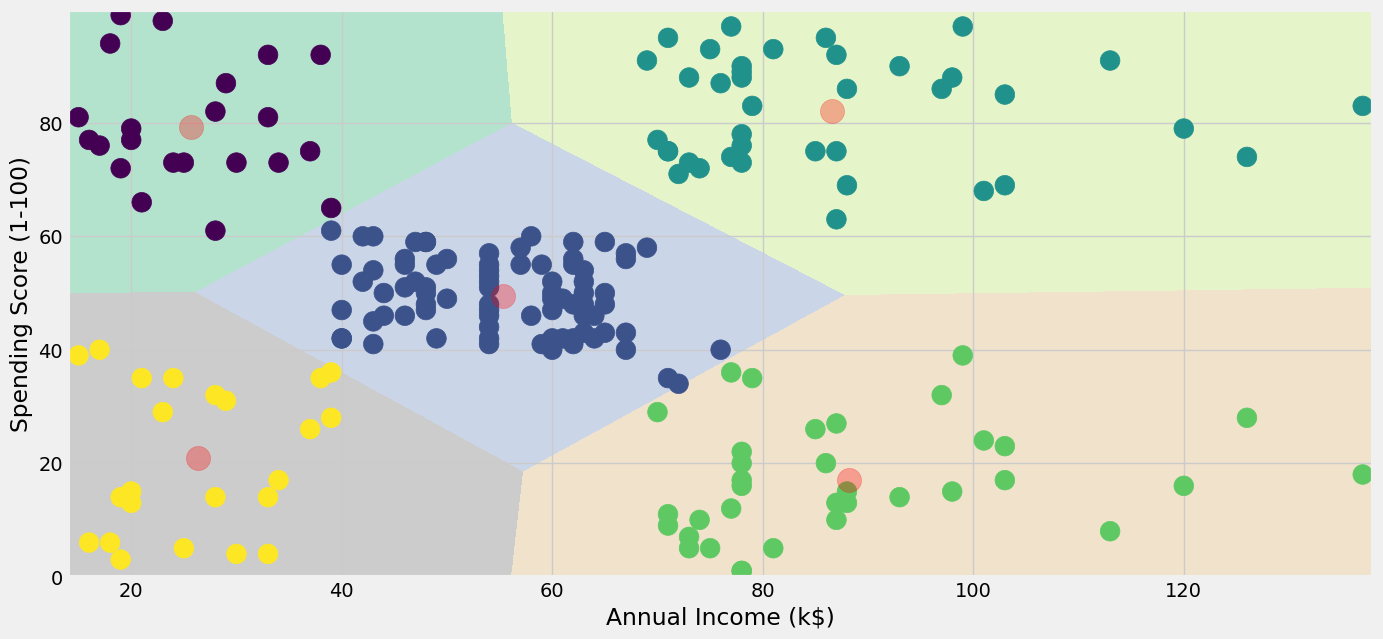

In [153]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
pred2= pred2.reshape(xx.shape)
plt.imshow(pred2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data , c = labels2 ,
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.3)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

iii.Segmentation using Age , Spending Score, and Annual Income

In [154]:
X3 = data[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 10):
    km = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  ) )
    km.fit(X3)
    inertia.append(km.inertia_)

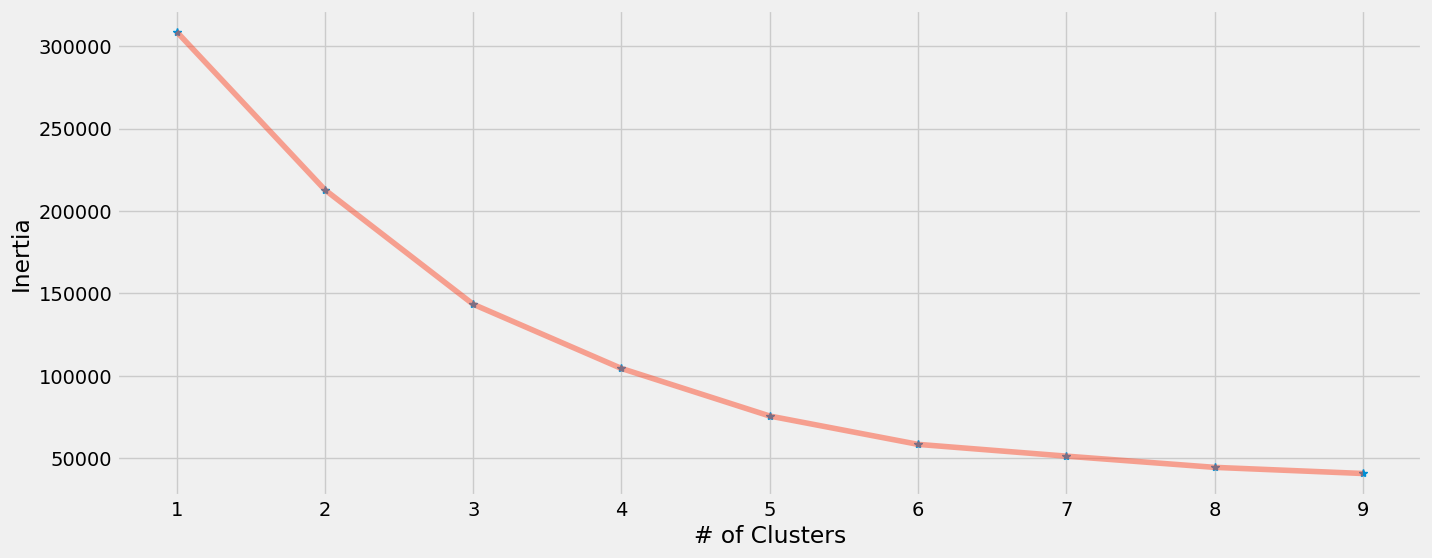

In [157]:

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , inertia , '*')
plt.plot(np.arange(1 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('# of Clusters') , plt.ylabel('Inertia')
plt.show()

In [158]:
km = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  ) )
km.fit(X3)
labels3 = km.labels_
centroids3 = km.cluster_centers_

In [159]:
import plotly.graph_objs as go
data['label3'] =  labels3
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['label3'],
        size= 20,
        line=dict(
            color= data['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)